<a href="https://colab.research.google.com/github/mateusmartinsperes/Curso-Python-Gustavo-Guanabara/blob/master/Gallstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
from google.colab import output
import pandas as pd
import io

# 1. Faz o upload
uploaded = files.upload()

# 2. Limpa a tela imediatamente após o upload terminar
output.clear()

# 3. Processa o arquivo sem precisar citar o nome dele
nome_do_arquivo = next(iter(uploaded))
# Adicione o decimal=',' para converter 62,8 em 62.8 automaticamente
table = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]), decimal=',')

# 4. Mostra apenas a tabela
print("Arquivo carregado e processado com sucesso!")
table.head()

Arquivo carregado e processado com sucesso!


,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#pré-processamento de dados
# O 'y' é a coluna Gallstone Status
y = table['Gallstone Status']

# O 'X' são todas as outras colunas (removemos a primeira)
X = table.drop('Gallstone Status', axis=1)

# treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#escalonamento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#treinamento e topologia
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. DEFINIÇÃO DA TOPOLOGIA (Configuração do Modelo)
# n_estimators: número de árvores na floresta
# max_depth: profundidade máxima de cada árvore (ajuda a evitar que a IA decore os dados)
# random_state: garante que o resultado seja o mesmo toda vez que você rodar
modelo_gallstone = RandomForestClassifier(
    n_estimators=100,
    max_depth=50,
    random_state=50
)

# 2. TREINAMENTO
# Aqui a IA analisa o X_train (exames) e o y_train (diagnóstico) para aprender os padrões
modelo_gallstone.fit(X_train, y_train)

# 3. TESTE E AVALIAÇÃO
# O modelo tenta prever os dados de teste que ele nunca viu antes
previsoes = modelo_gallstone.predict(X_test)

# Exibição dos Resultados
acuracia = accuracy_score(y_test, previsoes)
print(f"--- Treinamento Concluído ---")
print(f"Acurácia Geral: {acuracia * 100:.2f}%")
print("\nRelatório Detalhado:")
print(classification_report(y_test, previsoes))

--- Treinamento Concluído ---
Acurácia Geral: 81.25%

Relatório Detalhado:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        33
           1       0.83      0.77      0.80        31

    accuracy                           0.81        64
   macro avg       0.81      0.81      0.81        64
weighted avg       0.81      0.81      0.81        64



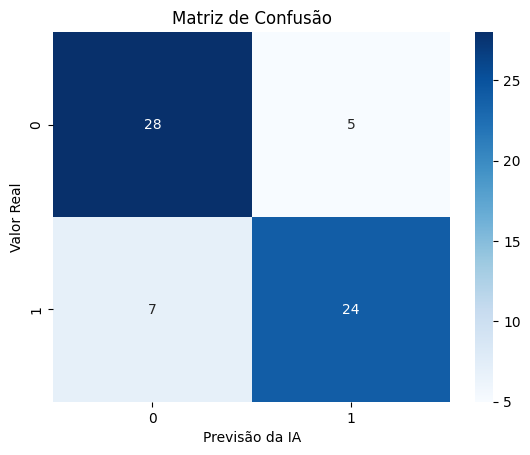

In [ ]:
#analise treinamento
#matriz confusão
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, previsoes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsão da IA')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

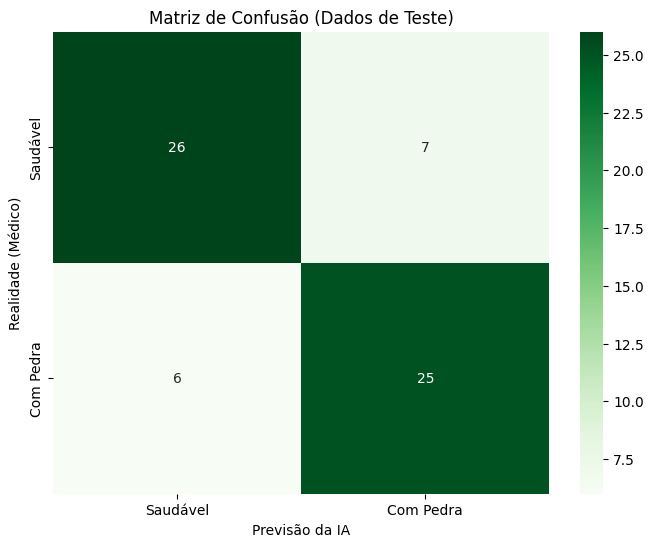


--- Relatório de Performance no Teste ---
              precision    recall  f1-score   support

    Saudável       0.81      0.79      0.80        33
   Com Pedra       0.78      0.81      0.79        31

    accuracy                           0.80        64
   macro avg       0.80      0.80      0.80        64
weighted avg       0.80      0.80      0.80        64



In [ ]:
#analise teste
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Obter as previsões
previsoes = modelo_gallstone.predict(X_test)
# Obter as probabilidades (importante para a curva ROC)
probabilidades = modelo_gallstone.predict_proba(X_test)[:, 1]

# 2. Matriz de Confusão
cm = confusion_matrix(y_test, previsoes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Saudável', 'Com Pedra'],
            yticklabels=['Saudável', 'Com Pedra'])
plt.title('Matriz de Confusão (Dados de Teste)')
plt.xlabel('Previsão da IA')
plt.ylabel('Realidade (Médico)')
plt.show()

# 3. Relatório Métrico
print("\n--- Relatório de Performance no Teste ---")
print(classification_report(y_test, previsoes, target_names=['Saudável', 'Com Pedra']))